In [125]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
X = data.drop(columns='target')

In [127]:
y = data['target']

In [128]:
feature_names = list(X.columns)
labels = y.unique()
target_names = ['False', 'True']
targets = dict(zip(labels,target_names))
data['target'] = data['target'].replace(targets)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=13)

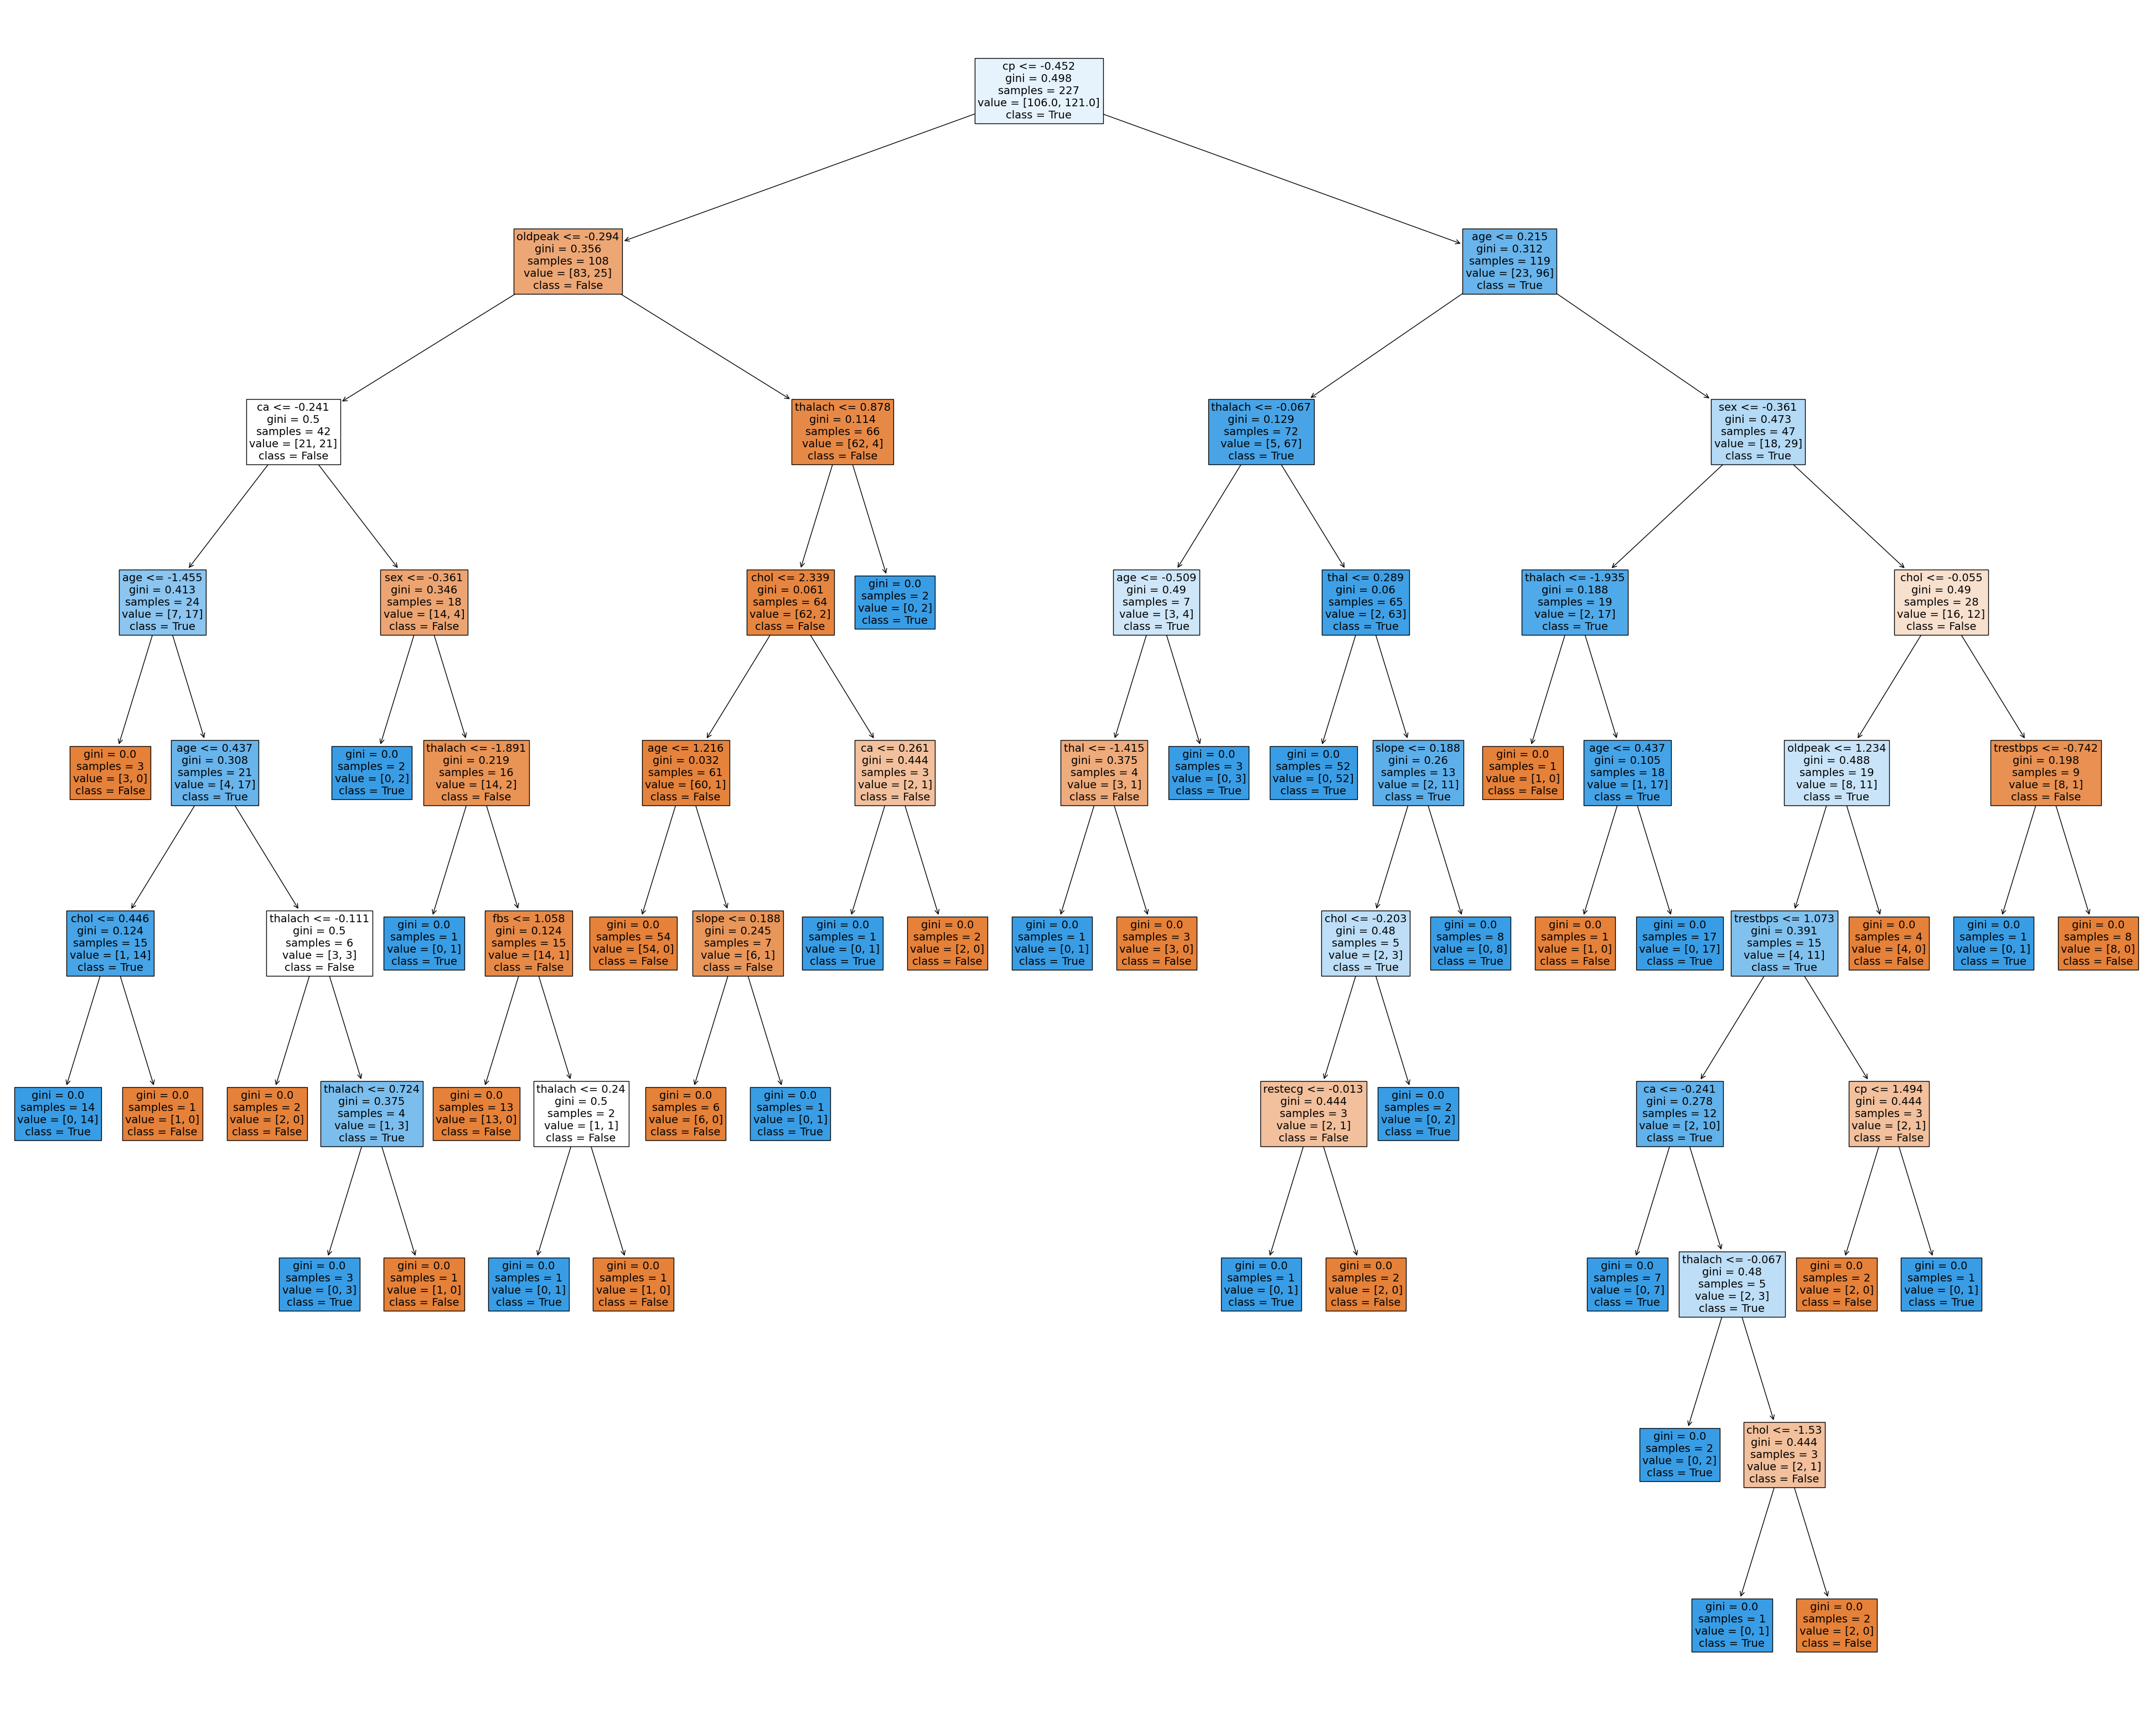

In [131]:
import matplotlib.pyplot as plt
from sklearn import tree

dt.fit(x_train,y_train)
plt.figure(facecolor='white',figsize=(50,40))
a = tree.plot_tree(dt,feature_names=feature_names,class_names=target_names,filled=True,fontsize=14
)

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

y_pred = dt.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("recall score: ",recall_score(y_test,y_pred))

Accuracy:  0.6710526315789473
Confusion Matrix: 
[[23  9]
 [16 28]]
F1 Score:  0.691358024691358
recall score:  0.6363636363636364


In [133]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=13)

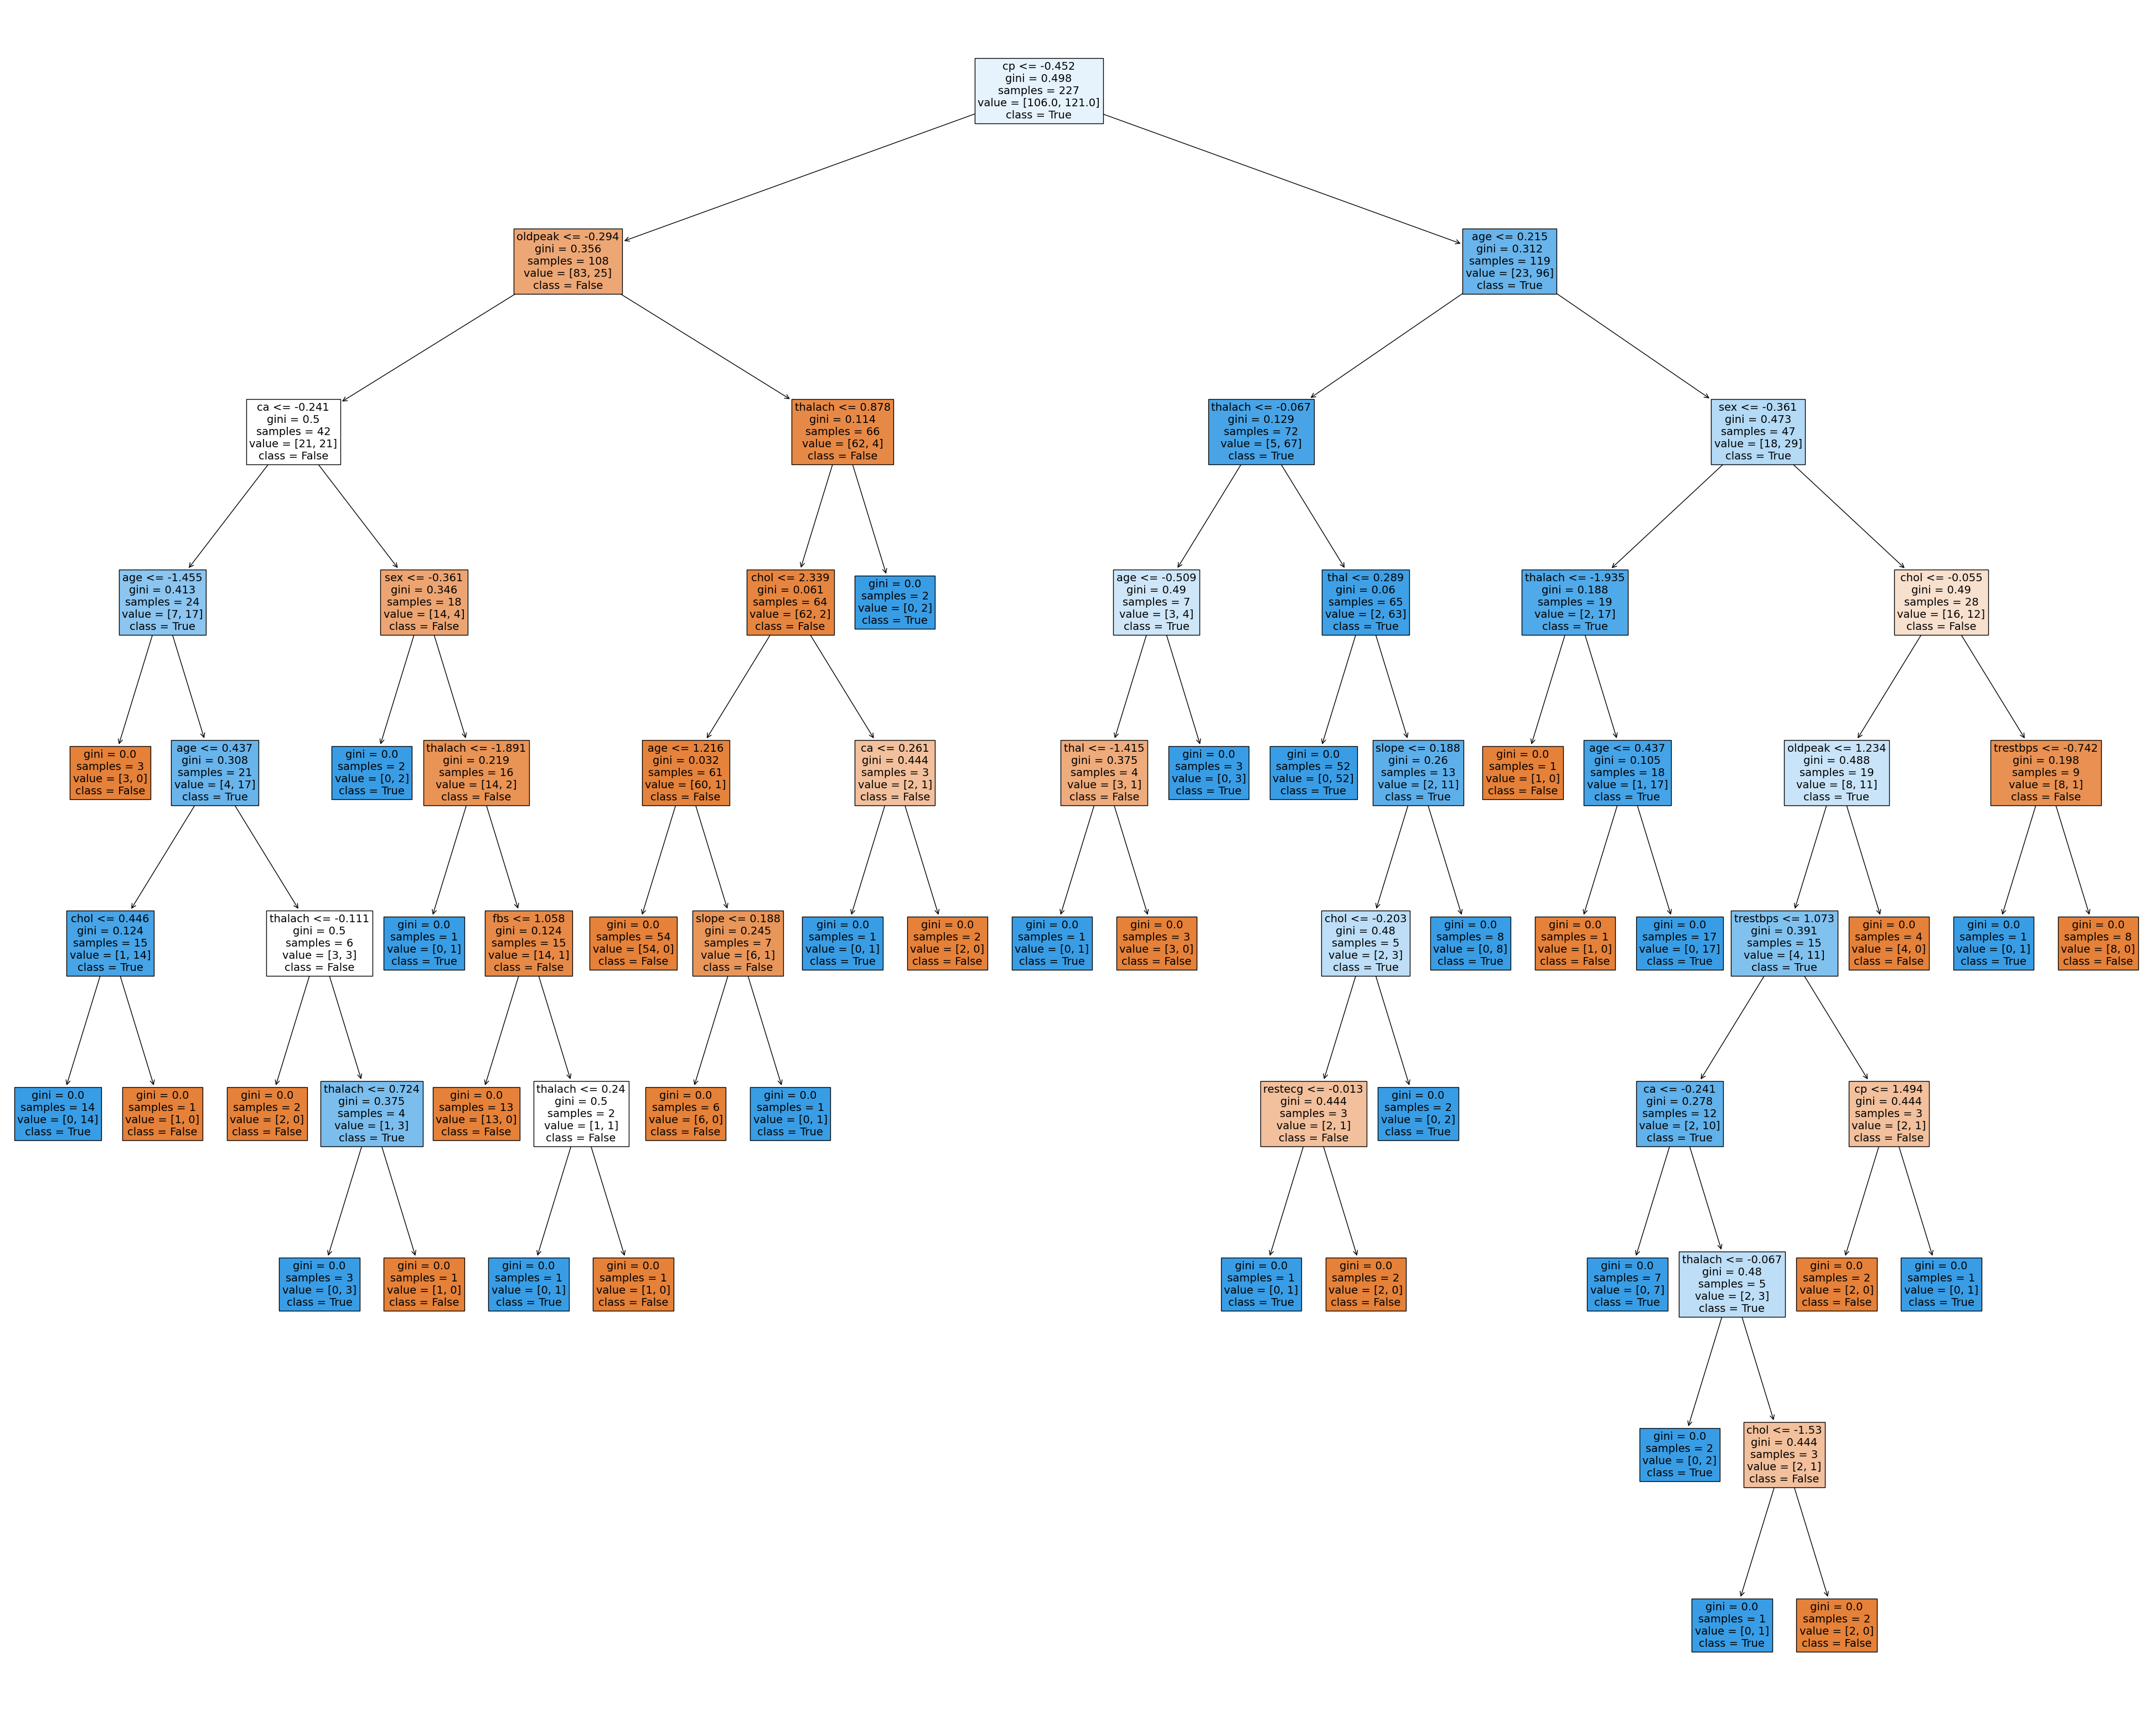

In [134]:
rf_classifier.fit(x_train,y_train)
plt.figure(facecolor='white',figsize=(50,40))
a = tree.plot_tree(dt,feature_names=feature_names,class_names=target_names,filled=True,fontsize=14)

In [135]:
y_pred = rf_classifier.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("recall score: ",recall_score(y_test,y_pred))

Accuracy:  0.7631578947368421
Confusion Matrix: 
[[24  8]
 [10 34]]
F1 Score:  0.7906976744186046
recall score:  0.7727272727272727


In [136]:
from sklearn.model_selection import GridSearchCV

In [138]:
importance = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'feature' : feature_names, 'importances': importance})
feature_importances = feature_importances.sort_values('importances', ascending=False)
feature_importances

,feature,importances
2,cp,0.220894
7,thalach,0.147086
11,ca,0.112820
12,thal,0.112660
9,oldpeak,0.106874
0,age,0.084920
4,chol,0.046229
10,slope,0.045793
3,trestbps,0.042777
8,exang,0.039454


In [155]:
param_grid = {'n_estimators' : [96, 100, 98], 'max_depth': [5, 6, 7], 'min_samples_split': [7,8,9]}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10,
                                              min_samples_split=13),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9],
                         'n_estimators': [96, 100, 98]},
             scoring='accuracy')

In [156]:
print('Best Hyperparameters: ', grid_search.best_params_)
print('Best Accuracy: ', grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 98}
Best Accuracy:  0.8454545454545455
